<a href="https://colab.research.google.com/github/mahesh-ml/MLBasics/blob/main/ConvOperationsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UsageError: Line magic function `%md` not found.


In [26]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
#Parameters
inChannels = 3 #RGB
outChannels= 15 #feature maps 15 diff kernels with kernelSize
kernelSize= 5 #should be an odd number
stride = 1
padding = 0

In [5]:
#create Conv2d instance
c = nn.Conv2d(inChannels , outChannels , 
              kernelSize , stride, padding)

In [6]:
#Print conv2d
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [8]:
#check weights , dimensions
print('size of weights: ' + str(c.weight.shape))
print('size of bias: ' + str(c.bias.shape))

size of weights: torch.Size([15, 3, 5, 5])
size of bias: torch.Size([15])


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


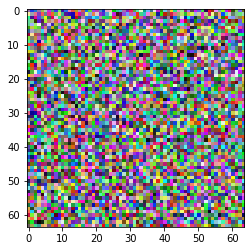

In [9]:
#lets look at convulation of an image
imgSize = (1,3,64,64) # N , Channels RGB, width , height
img = torch.rand(imgSize)
# pytorch needs channel first param but matplotlib need channel at last
img2View = img.permute(2,3,1,0).numpy() 
print(img.shape)
print(img2View.shape)

plt.imshow(np.squeeze(img2View))

In [10]:
#apply conv on test image
convRes =c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


In [32]:
#exercises
#convulve an image of size 1*256*256 to produce 1*252*84 result
inChans = 1 #RGB
imSize= [256,256]
outChans= 1
krnSize = 5 #should be odd 
stride = (1,3)
padding = 1

#create an instance
c1 = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

#create an image
img1 = torch.rand(1, inChans, imSize[0], imSize[1])

#run convulation
resimg = c1(img1)
empSize = torch.squeeze(resimg).shape

#compute size of the result with formula
expectSize = np.array([outChans, 0,0],dtype=int)
#formula (size + 2 * padding -kernelSize /stride)+1
print(imSize[0] , padding , krnSize ,stride[0] , (imSize[0] + 2 * padding - krnSize) / stride[0])
expectSize[1] = np.floor( (imSize[0] + 2 * padding - krnSize) / stride[0]) + 1
expectSize[2] = np.floor( (imSize[1] + 2 * padding - krnSize) / stride[1]) + 1


#print the size
print(f'Expected size : {expectSize}')
print(f'Empirical size : {list(expectSize)}')


256 1 5 1 253.0
Expected size : [  1 254  85]
Empirical size : [1, 254, 85]


In [75]:
#convulve an image of size 3*64*64 to produce 10*28*28 result
inChans = 3 #RGB
imSize= [64,64]
outChans= 10
krnSize = 3 #should be odd 
stride = (3,3)
padding = 10

#create an instance
c1 = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

#create an image
img1 = torch.rand(1, inChans, imSize[0], imSize[1])

#run convulation
resimg = c1(img1)
empSize = torch.squeeze(resimg).shape

#compute size of the result with formula
expectSize = np.array([outChans, 0,0],dtype=int)
#formula (size + 2 * padding -kernelSize /stride)+1
print(imSize[0] , padding , krnSize ,stride[0] , (imSize[0] + 2 * padding - krnSize) / stride[0])
expectSize[1] = np.floor( (imSize[0] + 2 * padding - krnSize) / stride[0]) + 1
expectSize[2] = np.floor( (imSize[1] + 2 * padding - krnSize) / stride[1]) + 1


#print the size
print(f'Expected size : {expectSize}')
print(f'Empirical size : {list(expectSize)}')

64 10 3 3 27.0
Expected size : [10 28 28]
Empirical size : [10, 28, 28]
